In [35]:
import numpy as np
import matplotlib.pyplot as plt

**Ajuste para rendija sencilla**

Acá vamos a usar el siguiente ajuste

$$ I=A \left(\frac{\sin(B x'+C)}{Bx'+C}\right)^2$$
Donde $A=I_0$, $B=\frac{\pi a}{\lambda L}$, $x'=x-x_0$ y $C$ es un desfase. Además, vamos a pasar $x$ a metros para mejor visibilidad. Este ajuste es válido en ángulos pequeños donde $\sin \theta \approx \tan \theta \approx \frac{x}{L}$.

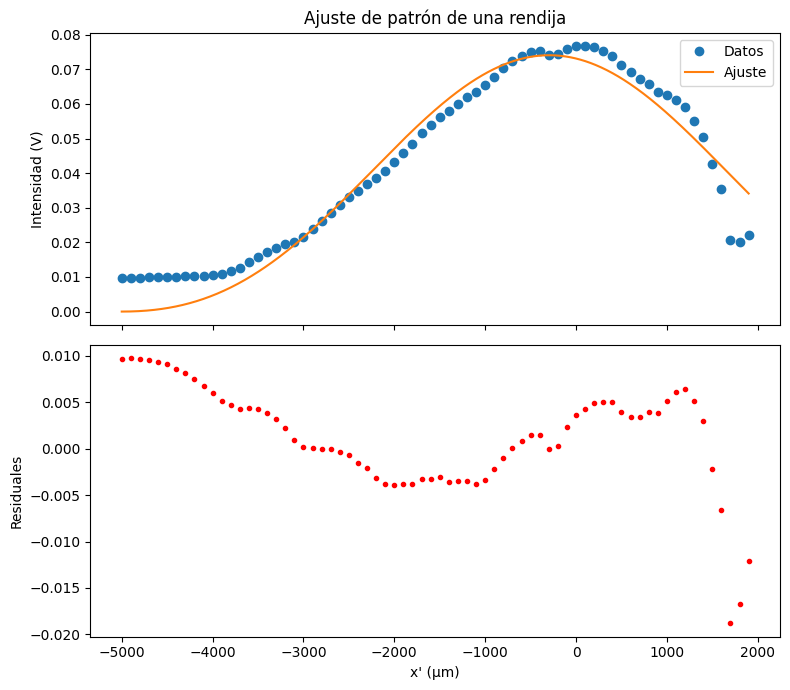

A = 0.07407 ± 0.00129
B = 667.65416 ± 16.28528  m⁻¹
C = 0.19672 ± 0.02918  rad
x₀ (centro del patrón) = 5000.01 μm
B teórico=1339.6983597397839 m⁻¹


(1.3444054730511424e-06, 3.2792448887909074e-08)

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

a = 1e-4    
λ = 670e-9  
L = 0.35          
B0_teorico = np.pi * a / (λ * L)


data = pd.read_excel("Doble Rendija.xlsx", sheet_name="Hoja3")
x_array = data['micras'].to_numpy() + 0.007
x = x_array * 1e-6 
I = data['voltaje'].to_numpy()


x0_indice = np.argmax(I)
x0 = x[x0_indice]
x_prima = x - x0


def modelo_rendija(x, A, B, C):
    arg = B * x + C
    return A * (np.sin(arg) / arg)**2


A0 = np.max(I)
params_iniciales = [A0, B0_teorico, 0.1]


params, cov = curve_fit(modelo_rendija, x_prima, I, p0=params_iniciales)
A_fit, B_fit, C_fit = params
errors = np.sqrt(np.diag(cov))

x_fit = np.linspace(x_prima.min(), x_prima.max(), 1000)
I_fit = modelo_rendija(x_fit, A_fit, B_fit, C_fit)
I_model = modelo_rendija(x_prima, A_fit, B_fit, C_fit)
residuals = I - I_model


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 7), sharex=True)

ax1.plot(x_prima * 1e6, I, 'o', label='Datos')
ax1.plot(x_fit * 1e6, I_fit, '-', label='Ajuste')
ax1.set_ylabel("Intensidad (V)")
ax1.legend()
ax1.set_title("Ajuste de patrón de una rendija")

ax2.plot(x_prima * 1e6, residuals, 'r.')
ax2.set_xlabel("x' (μm)")
ax2.set_ylabel("Residuales")

plt.tight_layout()
plt.show()

print(f"A = {A_fit:.5f} ± {errors[0]:.5f}")
print(f"B = {B_fit:.5f} ± {errors[1]:.5f}  m⁻¹")
print(f"C = {C_fit:.5f} ± {errors[2]:.5f}  rad")
print(f"x₀ (centro del patrón) = {x0*1e6:.2f} μm")
print(f"B teórico={B0_teorico} m⁻¹")

exp_lambda=(np.pi * a)/(B_fit*L)
inc_lambda=(np.pi * a*errors[1])/((B_fit)**2*L)

exp_lambda,inc_lambda


Con este código, que realmente no supe mejorar, $B=667.65416 \pm 16.28528 \text{m}^{-1}$. Ya sabemos que $B=\frac{\pi a}{\lambda L}$. Por lo tanto, $\lambda=\frac{\pi a}{BL}$ y $\sigma_\lambda=\frac{\pi a}{B^2 L}\sigma_B$. Teniendo eso en cuenta, $\lambda=(1340 \pm 30) \text{nm}$